In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalizating data
x_train, x_test = x_train/255.0, x_test/255.0 

print("x_train={0}".format(x_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("x_test={0}".format(x_test.shape))
print("y_test={0}".format(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
x_train=(60000, 28, 28)
y_train=(60000,)
x_test=(10000, 28, 28)
y_test=(10000,)


In [3]:
cnn = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(2,2),strides=(1,1),padding="same",filters=16,activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(1,1)),
      tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(1,1),padding="valid",filters=32,activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(1,1)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'), 
      tf.keras.layers.Dropout(0.3), 
      tf.keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [5]:
x_train=x_train.reshape((60000,28,28,1))
x_train.shape,y_train.shape

((60000, 28, 28, 1), (60000,))

In [6]:
hist = cnn.fit(x_train,y_train,epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1398 - accuracy: 0.9575
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0602 - accuracy: 0.9822
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9861
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9896
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9918
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0215 - accuracy: 0.9932
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

### graph of accuracy and loss

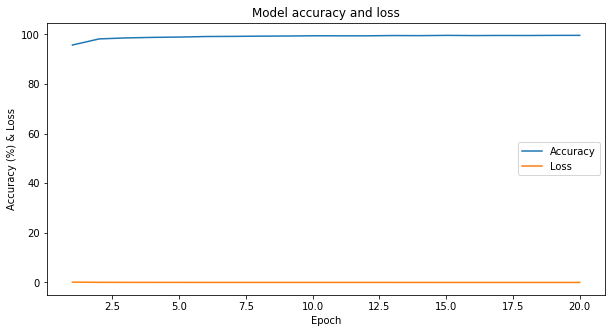

In [16]:
# Plot accuracy & loss
epochs = 20
acc_list = [100 * i for i in hist.history['accuracy']]
loss_list = [i for i in hist.history['loss']]
plt.figure(figsize=(10,5))
plt.plot(range(1,epochs+1),acc_list)  #history.history['accuracy'])
plt.plot(range(1,epochs+1),loss_list)  #history.history['loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Accuracy (%) & Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='center right')

### test of cnn

In [7]:
predictions=cnn.predict(x_test.reshape((10000,28,28,1))) 
predictions

array([[8.3232106e-32, 1.6190545e-22, 6.9279123e-22, ..., 1.0000000e+00,
        3.3222561e-25, 1.2774467e-19],
       [5.3533426e-26, 1.7112156e-24, 1.0000000e+00, ..., 5.8934066e-30,
        1.3478883e-28, 0.0000000e+00],
       [1.9683815e-15, 1.0000000e+00, 3.0717233e-14, ..., 2.0933922e-13,
        1.2653368e-11, 3.6844663e-17],
       ...,
       [7.9467053e-38, 5.5177160e-26, 5.7073459e-27, ..., 4.2331626e-26,
        8.2875593e-19, 2.1029937e-16],
       [2.3213721e-24, 1.1110556e-26, 1.8093051e-27, ..., 1.6454394e-25,
        2.4676762e-14, 1.7941239e-18],
       [2.0744185e-19, 1.6292073e-24, 7.5769449e-19, ..., 1.7667221e-38,
        1.8096896e-14, 4.4549179e-27]], dtype=float32)

In [8]:
scores = cnn.evaluate(x_test.reshape((10000,28,28,1)), y_test)
scores

313/313 [==============================] - 1s 2ms/step - loss: 0.0587 - accuracy: 0.9910


[0.058734502643346786, 0.9909999966621399]

In [9]:
np.argmax(predictions,axis=1).shape

(10000,)

In [10]:
(np.argmax(predictions,axis=1)==y_test).sum()/len(predictions)*100 # %

99.1